## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
row_count = df.count()['user_id']
row_count

294478

_ans_: There are **294478** rows in the given Data Set.

c. The number of unique users in the dataset.

In [4]:
user_count = df.nunique()['user_id']
user_count

290584

_ans_: There are **290584** unique users

d. The proportion of users converted.

In [5]:
conv_count = df.converted.sum()
conv_prop = conv_count/row_count
conv_prop

0.11965919355605512

_ans_: The proportion of users converted is **11.96%**.

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [7]:
# From the above grouping
treatment_oldP = 1965
control_newP = 1928
sum_ = treatment_oldP + control_newP
sum_

3893

_ans_: The number of times `new_page` and `treatment` dont match is **3893**.

In [8]:
# Same logic used as Query
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [9]:
df.isna().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

There are no missing values for any rows/columns as can be seen above.

...

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').index)

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2_row_count = df2.nunique()['user_id']
df2_row_count

290584

_ans_: There are **290584** unique User ids.

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(['user_id'], keep = False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

_ans_: User ID **773192** is repeated twice.

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2.timestamp == '2017-01-09 05:37:58.781806')].index)
df2[df2.user_id== 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
converted_count = df2[df2.converted == 1].count()
p_converted = converted_count / df2_row_count
p_converted.user_id

0.11959708724499628

_ans_: The probability of an individual converting regardless of the page they receive is **11.95%**.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2.groupby(['group','converted'],as_index=False).count()

,group,converted,user_id,timestamp,landing_page
0,control,0,127785,127785,127785
1,control,1,17489,17489,17489
2,treatment,0,128046,128046,128046
3,treatment,1,17264,17264,17264


In [19]:
control_converted_users = df2.query('converted == 1 and group == "control"')['user_id'].count()
control_group = df2.query('group == "control"')['user_id'].count()
p_converted = control_converted_users / control_group
p_converted

0.1203863045004612

_ans_: Individual in the `control` group gets converted with a probability of **12.03%**.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treatment_converted_users = df2.query('converted == 1 and group == "treatment"')['user_id'].count()
treatment_group = df2.query('group == "treatment"')['user_id'].count()
p_treatment_group = treatment_converted_users / treatment_group
p_treatment_group

0.11880806551510564

_ans_: Individual in the `treatment` group gets converted with a probability of **11.88%**.

d. What is the probability that an individual received the new page?

In [21]:
count_newpage = df2[df2.landing_page == 'new_page'].count()['user_id']
p_newpage = count_newpage/df2_row_count
p_newpage

0.50006194422266881

_ans_: The probability that an individual receives the new page is roughly about **50%**.

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

_ans_: The probability of conversion regardless of page is **11.95%**. The probability of conversion from `control` group is **12.03%**. The probability of conversion from `treatment` group is **11.88%**. Since all the 3 probabilities are almost the same with delta **~0.5%**, the evidence obtained thus far to support that _' new page leads to more conversions '_ is **inconclusive**.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 **$H_{0}$** = **$p_{new}$** - **$p_{old}$** <= 0

 **$H_{1}$** = **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
converted_count = df2.query('converted==1')['user_id'].count()
p_new = converted_count / df2_row_count
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
converted_count = df2.query('converted==1')['user_id'].count()
p_old = converted_count / df2_row_count
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new=df2.query('group == "treatment"').nunique()['user_id']
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 1, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_diff = new_page_converted.mean()  - old_page_converted.mean()
p_diff

-0.00016054437411466838

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_new)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

In [30]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   11.,    49.,   326.,  1183.,  2549.,  2922.,  1996.,   777.,
          163.,    24.]),
 array([-0.00487922, -0.00395843, -0.00303764, -0.00211685, -0.00119606,
        -0.00027527,  0.00064552,  0.00156631,  0.0024871 ,  0.00340789,
         0.00432868]),
 <a list of 10 Patch objects>)

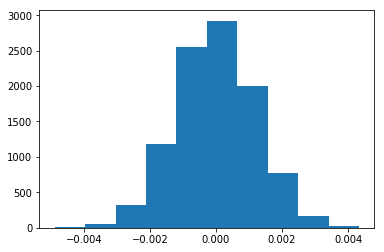

In [31]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
act_new=df2.query('landing_page=="new_page"')['converted'].mean()
act_old=df2.query('landing_page=="old_page"')['converted'].mean()
act_diff=act_new - act_old
act_diff

-0.0015782389853555567

In [33]:
(p_diffs > act_diff).mean()

0.90559999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Answer -

* We calulated the actual mean diffrence between treatment and control group to calculate P value.

* **0.905** is called the P Value. Also stated as **90.5%**.
    
    This means that if we reject the Null Hypothesis and implement the new page design as stated in the Alternate Hypothesis, then there is a 90.5% chance of making the **TYPE 1** Error


* This is much greater than the accepted Type 1 probability of 5%

* P value is dependent on our alernative hypothesis 
    Our alternate hypothesis 
    
    **$H_{1}$** = **$p_{new}$** - **$p_{old}$** > 0 (p_diffs > act_diff).mean()


*  Since P_value we obtained is very high that is 0.90 and Our alpha is 0.05 
    if P_value is greater than alpha (Type 1 error) We fail to reject the null hyothesis.
<hr>




l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
from pandas.core import datetools

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").count()['user_id']
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").count()['user_id']
n_old = df2[df2['group'] == 'control'].count()['user_id']
n_new = df2[df2['group'] == 'treatment'].count()['user_id']

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [36]:
from scipy.stats import norm
norm.ppf(1 - (0.05 / 2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* P_value is same as computed in the previous section. Hence, it is not advisable to reject the Null Hypothesis.
* Z_score does not exceed the critical value of 1.9599 we cant reject the null phypothesis so its not recommended to change from old page to new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

_ans_: Since the responses are binary, the problem has categirical response. Hence, Logistic Regression can be used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1

df2[['old_page','new_page']] = pd.get_dummies(df2['landing_page'])

df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
import statsmodels.api as sm
regressor = sm.Logit(df2['converted'], df2[['intercept' ,'new_page']])
results = regressor.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-02-19 18:24 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
new_page      0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* Null and Alternative hypotheses Changes to

    $H_{0}: p_{new}=p_{old}$ (instead of $\le$)

    $H_{0}: p_{new}\ne p_{old}$ (instead of $\gt$)
    

* logestic regression says implementing new page brings down converstion rate by 1.5% 

*  Part 2 says that P_old > alpha We fail to reject Null Hypotheses,Here our alpha is Type 1 error which is 0.05% and P_old is 0.90%

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factors that may influce the conversion rate includes few of the following 
1.geographical location of user.
2.Time Stamp
3.Browser
All the above terms can be used as a categorical variable.
chances that above mentioned explanatory varibale have multicollinearity as to be identified by scatterplot matrix or VIF's 
Higher order terms needs to be added if the explanatory variables are highly co rellated which will make the model more complex


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
df3 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [42]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
df3['intercept'] = 1
df3[['UK','US','CA']] = pd.get_dummies(df3['country'])[['UK','US','CA']]
df3 = df3.drop(columns ='CA',axis =1)
mod = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK']])

results = mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-02-19 18:24 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']

In [45]:
df3_logit = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result_2 = df3_logit.fit()
result_2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:               3.482e-05
Time:                        18:24:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0715      0.037    -55.798      0.000      -2.144      -1.999
new_page        0.0674      0.052      1.297      0.195      -0.034       0.169
UK_new_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_new_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK              0.0901      0.040      2.225      0.026       0.011       0.169
US              0.0644      0.038      1.679      0.093      -0.011       0.140
===============================================================================
"""

In [47]:
np.exp(result_2.params)

intercept      0.126002
new_page       1.069775
UK_new_page    0.924703
US_new_page    0.954198
UK             1.094247
US             1.066532
dtype: float64

**Conclusion**

* CA_new_page and 'US_new_page'are the interaction terms produced from country dataset and new_page. These are the higher order terms

* Conversion is 7.8% less likely to happen for the users in UK than CA, holding all other varible constant.

* Conversion is 46% less likely to happen for the users in US than CA, holding all other varible constant.

* Conversion is 1.08 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.

* Conversion is 1.03 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0